The dataset contains 1.**demographic**, 2.**billing method** and 3.**services** being used by customers.

It also provides tenure, the number of months customers stick to the subscription.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#tenure, MonthlyCharges, and TotalCharges are the only numeric variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#converting TotalCharges variable from object to floating point.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#converting SeniorCitizn values from 0,1 to boolean value of Yes, No
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1: 'Yes'})

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
TotalCharges,11
gender,0
SeniorCitizen,0
Partner,0
customerID,0
Dependents,0
tenure,0
MultipleLines,0
PhoneService,0
OnlineSecurity,0


In [ ]:
#check the missing values of total charges variable
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#it seems all tenure of 0 variables have totalcgarges of NaN, it make sense they have no totalcharges, therfore, impute the TotalCharges values with 0
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.fillna({'TotalCharges' : 0}, inplace = True)

In [ ]:
#the duplicated data entries
df.duplicated().sum()

np.int64(0)

**Numerical data**
evaluating the distribution and descriptive characteristics of numerical variables.

In [ ]:
#extracting numerical variables for further analysis
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_numeric.head(30)
df_numeric['charge_diff'] = df_numeric['TotalCharges'] - df_numeric['tenure']*df_numeric['MonthlyCharges']

If charge_diff ≈ 0: charges are consistent with subscription

If charge_diff < 0: they may have discounts, waivers, or unused months

If charge_diff > 0: possible prepaid months, extra charges, or errors



In [ ]:
df_numeric.describe().T
#as the numerical variables have no missing values, their statistics value seem to be normal and have no anomaly character

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
charge_diff,7043.0,0.152953,67.202778,-370.85,-28.60,0.00,28.50,373.25


In [ ]:
df_numeric['churn'] = df['Churn']
df_numeric['churn'] = df_numeric['churn'].map( {'Yes': 1, 'No': 0})

In [ ]:
#the diffs show that some customers had less than their t=moanthly charge payment and some had more.
# we can consider the effect of the charge diff on customers' behavior and churn
df_numeric.head()

,tenure,MonthlyCharges,TotalCharges,charge_diff,churn
0,1,29.85,29.85,0.00,0
1,34,56.95,1889.50,-46.80,0
2,2,53.85,108.15,0.45,1
3,45,42.30,1840.75,-62.75,0
4,2,70.70,151.65,10.25,1


In [ ]:
#corr between numeric variables
df_numeric.corr(method = 'spearman')

,tenure,MonthlyCharges,TotalCharges,charge_diff,churn
tenure,1.000000,0.276417,0.889696,0.006057,-0.367062
MonthlyCharges,0.276417,1.000000,0.638028,0.008778,0.184743
TotalCharges,0.889696,0.638028,1.000000,0.030339,-0.229955
charge_diff,0.006057,0.008778,0.030339,1.000000,-0.002715
churn,-0.367062,0.184743,-0.229955,-0.002715,1.000000


For futher analysis of model training with logistic regression we're going to leave some of the variables and keep some of them.
**MonthlyCharges**, **tenure** are going to be kept
**charge_diff** has almost zero relationship, **totalchargs** will be ignored due to its high collinearity with **tenure**.

In [ ]:
#considering categorical variables rerlationship
#statistical associations between churn and categorical variables; Chi-Squared Test and Cramér’s V


import numpy as np
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))


In [ ]:
categorical_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for var in categorical_col:
  print(var, cramers_v(df[var], df['Churn']))


gender 0.008290505631771371
SeniorCitizen 0.15045309974200427
Partner 0.15012578474988478
Dependents 0.1638703967886369
PhoneService 0.011398285522718045
MultipleLines 0.04010925283378871
InternetService 0.32245455521230887
OnlineSecurity 0.3474004326740552
OnlineBackup 0.2923155121954445
DeviceProtection 0.281579732968073
TechSupport 0.3429161982469257
StreamingTV 0.2305023384466809
StreamingMovies 0.23095080906926801
Contract 0.4101156965761409
PaperlessBilling 0.19149814355338285
PaymentMethod 0.30335862555407056


Based onthe barplot of variable and the cramers' v score, gender, Phoneservice, MultipleLines have no discriminative power and we are going to ignore it .

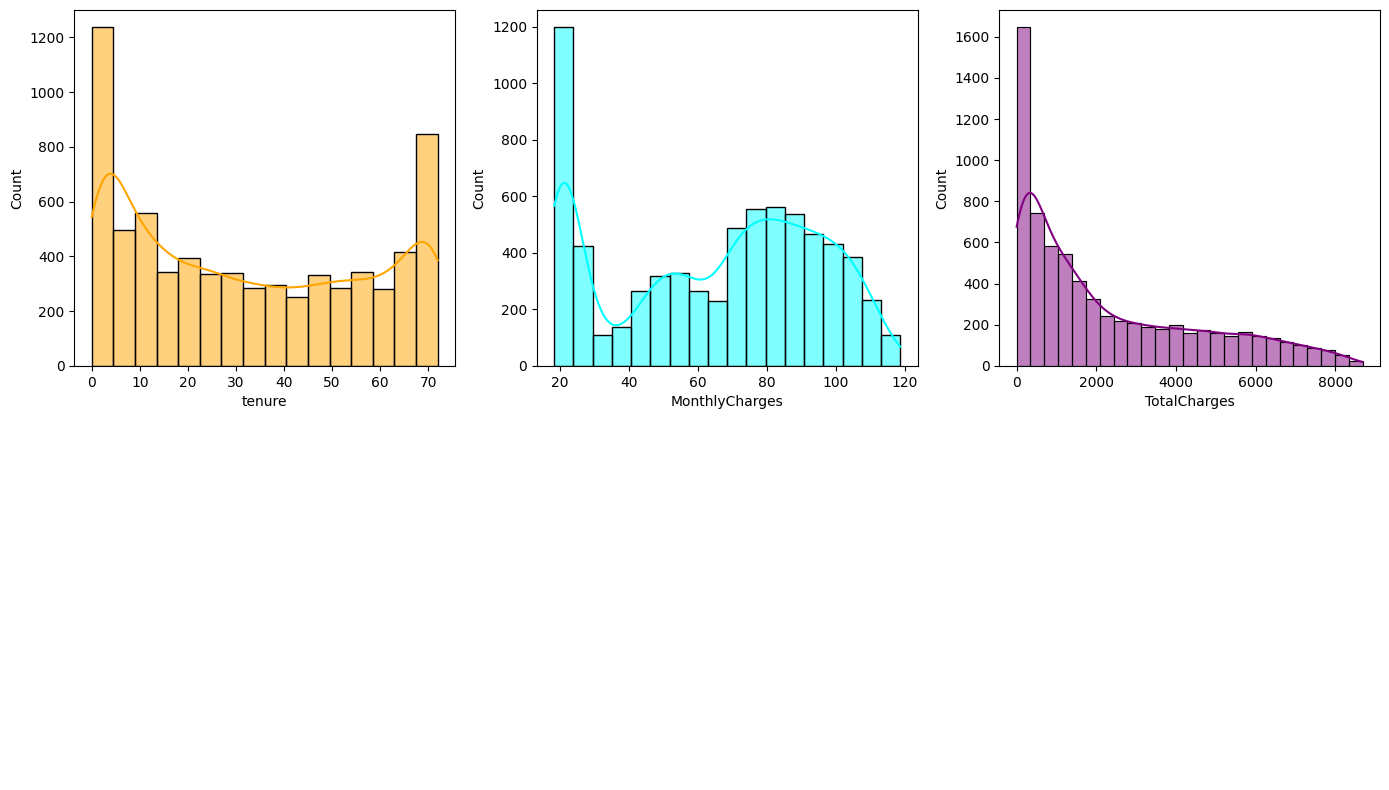

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of colors
colors = ['orange', 'cyan', 'purple']

# Calculate the number of rows and columns for the subplot grid
n_vars = len(df_numeric.columns)
n_cols = 3  # You can adjust this to change the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through numerical columns and create histograms
for i, variable in enumerate(df_numeric.columns):
    color = colors[i % len(colors)]  # Cycle through the colors
    sns.histplot(df_numeric[variable], ax=axes[i], kde=True, color=color)


# Hide any unused subplots
for i in range(n_vars-2, n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# segmeentation of tenure groups
def tenure_segment(x):
  if x <12:
    return'new'
  elif x <=29:
    return'early'
  elif x <=55:
    return'mid'
  else:
    return'loyal'

df['tenure_segment'] = df['tenure'].apply(tenure_segment)

In [ ]:
cols = list(df.columns)
cols.remove('tenure_segment')
cols.insert(6,'tenure_segment')
df = df[cols]

In [ ]:
#The tenure and Totalcharges obviously from the histogram do not follow normal distributions, to asses the normality of monthly charges, we will use a statistical test.
#Shapiro Wilk test for large sample sizes, more than 5000, is not reliable. Therefore, let's consider Kolmogrov Smirnov.

statistics, p_val = stats.kstest(df['MonthlyCharges'], 'norm')


In [ ]:
p_val
#Reject the H0, therefore, the variable doesn't follow a normal distribution.

np.float64(0.0)

**Outlier Detection & Normalization**

In [ ]:
#finding the outliers of the variables, interquantile range:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR

In [ ]:
#each variable's outlier counts
(df_numeric[(df_numeric<low_limit)| (df_numeric>up_limit)].count())

,0
tenure,0
MonthlyCharges,0
TotalCharges,0
charge_diff,684
churn,0


**Bivariate visualization**

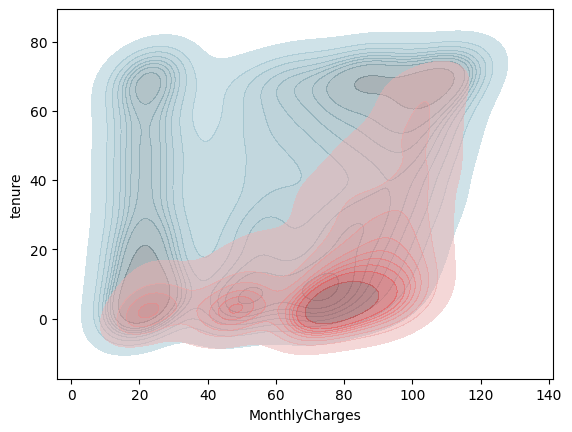

In [ ]:
sns.kdeplot(data=df, x='MonthlyCharges', y='tenure', hue='Churn',palette =['#ADD8E6', '#F08080'], fill=True, alpha=0.5, legend=False)
plt.show()


The relationship between tenure and monthly charges is non-linear but reveals a strong behavioral pattern: churn is concentrated among customers with high monthly payments and low tenure. In contrast, long-tenure customers exhibit very low churn regardless of pricing."

In [ ]:
#finding correlation number and correlation test between the MonthlyCharges and tenure
#correlation test
correlation, p_value = stats.pearsonr(df_numeric['MonthlyCharges'], df_numeric['tenure'])
print('corr score:', correlation)
print('p_val:', p_value)

corr score: 0.24789985628615008
p_val: 4.094044991496803e-99


**Categorical data**: Evaluating barplots of variables


In [ ]:
df_categorical = df.select_dtypes(include ='object')

In [ ]:
df_categorical.shape

(7043, 19)

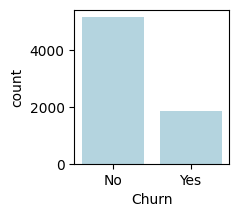

In [ ]:
#considering the count of target variables

plt.figure(figsize=(2, 2))
# Create the plot with Seaborn
sns.countplot(x='Churn', data=df_categorical, color = '#ADD8E6', linewidth=1)

plt.show()

To prevent biased modelling we need to balance the target variable, churn.
SMOTE sampling

**1.** Almost half of the customers are female and the other half are male.

**2.** Around 36% of the customers have stopped using the services.

**3.** Phone service with proportion of 90.3% is the most used service.


In [ ]:
gender_churn_rate = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
gender_churn_rate

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


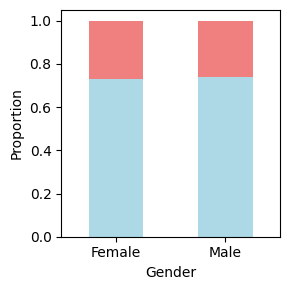

In [ ]:
#Normalized Churn Rate by Gender
gender_churn_rate[['No', 'Yes']].plot(
    kind='bar',
    stacked=True,
    figsize=(3, 3),
    color=['#ADD8E6', '#F08080']
)

plt.ylabel("Proportion")
plt.xlabel("Gender")
plt.legend().set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# considerring family status
def family_status(row):
    if row['Partner'] == 'Yes' and row['Dependents'] == 'Yes':
        return 'Partner & Dependents'
    elif row['Partner'] == 'Yes':
        return 'Partner Only'
    elif row['Dependents'] == 'Yes':
        return 'Dependents Only'
    else:
        return 'Single'

df['FamilyStatus'] = df.apply(family_status, axis=1)


In [ ]:
df.FamilyStatus.unique()

array(['Partner Only', 'Single', 'Dependents Only',
       'Partner & Dependents'], dtype=object)

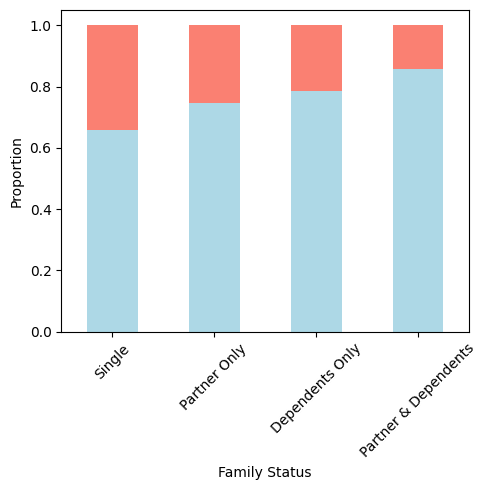

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['Single', 'Partner Only', 'Dependents Only',
       'Partner & Dependents']
#Normalized Churn Rate by Family Status
family_churn = df.groupby('FamilyStatus')['Churn'].value_counts(normalize=True).unstack()
family_churn = family_churn.reindex(order)
family_churn[['No', 'Yes']].plot(
    kind='bar',
    stacked=True,
    figsize=(5, 5),
    color=['lightblue', 'salmon']
)



plt.ylabel("Proportion")
plt.xlabel("Family Status")
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


custoners bing sinlge are moer willing to churn and the ones having family are less likely to churn.

-Both of the genders have the same trend in using the telecommunicating service.



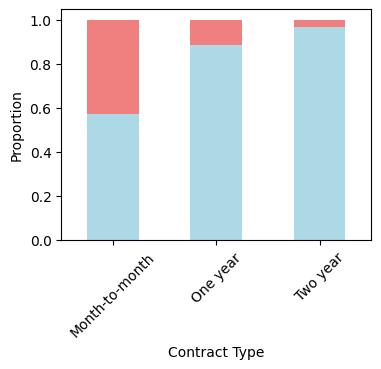

In [ ]:
#churn rates per contract type, normalized stacked bar
churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
churn_rates.plot(kind='bar', stacked=True, figsize=(4,3), color=['#ADD8E6', '#F08080'])

plt.ylabel("Proportion")
plt.xlabel("Contract Type")
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.show()


In [ ]:

# 2-way contingency matrix
df_crosstab = pd.crosstab(df_categorical['Contract'], df_categorical['Churn'])

# Adding total to row and columns
df_crosstab['Total'] = df_crosstab.sum(axis=1)
df_crosstab.loc['Total'] = df_crosstab.sum(axis=0)

df_crosstab

Churn,No,Yes,Total
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
Total,5174,1869,7043


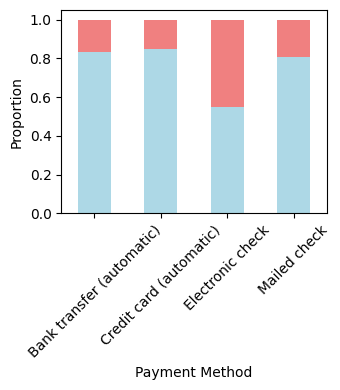

In [ ]:
churn_rates = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

churn_rates[['No', 'Yes']].plot(
    kind='bar',
    stacked=True,
    figsize=(3.5, 4),
    color=['#ADD8E6', '#F08080']
)


plt.ylabel("Proportion")
plt.xlabel("Payment Method")
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


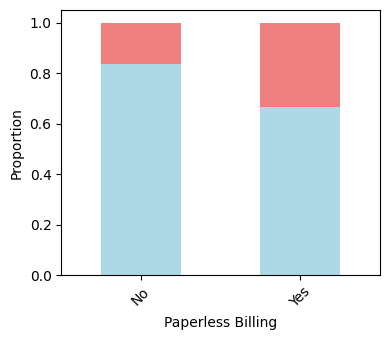

In [ ]:
#Normalized Churn Rate by Paper Billing
churn_rates = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()

churn_rates[['No', 'Yes']].plot(
    kind='bar',
    stacked=True,
    figsize=(4, 3.5),
    color=['#ADD8E6', '#F08080']
)


plt.ylabel("Proportion")
plt.xlabel("Paperless Billing")
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['charge_diff'] = df_numeric['charge_diff']

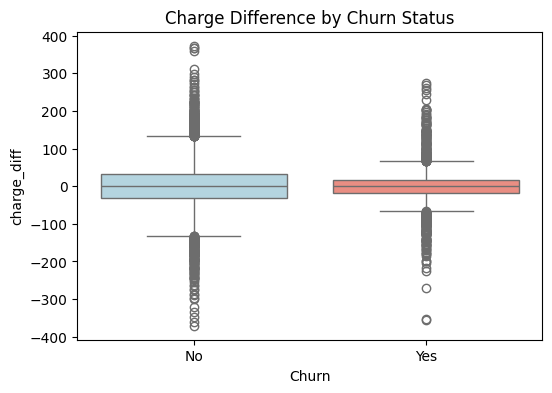

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='charge_diff', data=df, hue = 'Churn', palette=['lightblue', 'salmon'])
plt.title('Charge Difference by Churn Status')
plt.show()

churners are more centered around the center.

customers with high discounts seem not to leave the subscription.


looking at the contingency table and the barplot, electronic checks are the paymenht methods that the users are mor prone to quit the service.

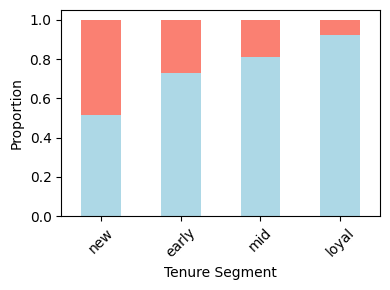

In [ ]:
# Step 1: Define custom order
order = ['new', 'early', 'mid', 'loyal']

# Step 2: Reorder the 'tenure_segment' column
df['tenure_segment'] = pd.Categorical(df['tenure_segment'], categories=order, ordered=True )

# Step 3: Recalculate churn rate
tenure_churn_rate = df.groupby('tenure_segment', observed=False)['Churn'].value_counts(normalize=True).unstack()

# Step 4: Plot with correct order
tenure_churn_rate = tenure_churn_rate.loc[order]  # enforce order in plot

tenure_churn_rate[['No', 'Yes']].plot(
    kind='bar',
    stacked=True,
    figsize=(4, 3),
    color=['lightblue', 'salmon']
)


plt.ylabel("Proportion")
plt.xlabel("Tenure Segment")
plt.legend().set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The lower is the tenure, the more the customer is prone to churn.

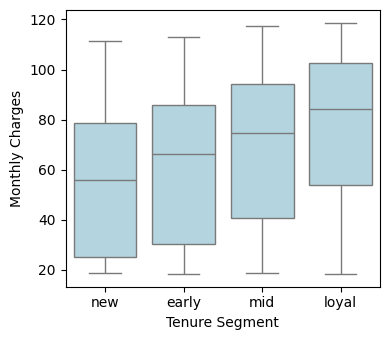

In [ ]:
#showing monthly charges with customers' tenure segments
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3.5))
sns.boxplot(x='tenure_segment', y='MonthlyCharges',data=df,
            color='lightblue')


plt.xlabel('Tenure Segment')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


MonthlyCharges generally increase with customer tenure → loyal customers are paying more

New customers tend to be on cheaper plans (lower median)

Loyal customers likely have more services or upgrades (higher variance and median)

In [ ]:
df2 = df.copy()
df2[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df2[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')
df2['MultipleLines'] = df2['MultipleLines'].replace('No phone service', 'No')

In [ ]:
#customers with tech supports and security services tend to have less churn
summary_df

,Service,Option,Churn_No,Churn_Yes
0,InternetService,DSL,0.81,0.19
1,InternetService,Fiber optic,0.58,0.42
2,InternetService,No,0.93,0.07
3,OnlineSecurity,No,0.69,0.31
4,OnlineSecurity,Yes,0.85,0.15
5,TechSupport,No,0.69,0.31
6,TechSupport,Yes,0.85,0.15


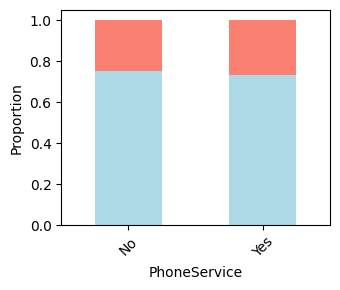

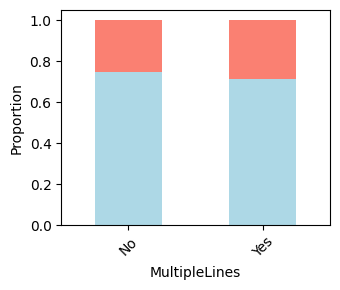

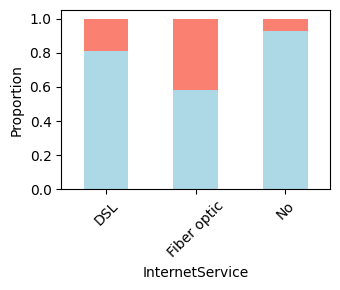

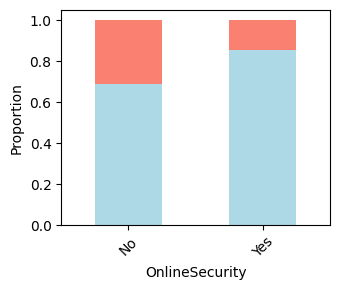

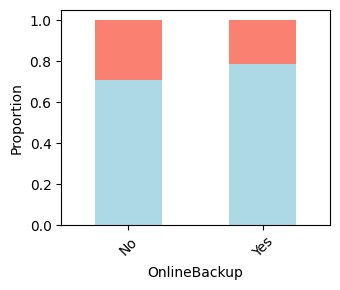

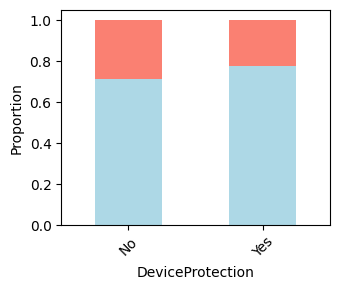

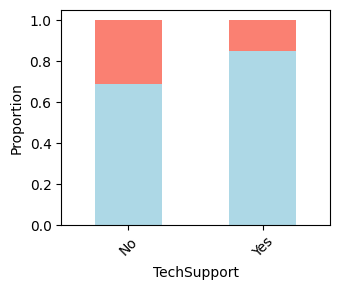

In [ ]:
#considering the available services:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport']


for col in service_cols:
    service_churn_rate = df2.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    service_churn_rate[['No', 'Yes']].plot(
        kind='bar',
        stacked=True,
        figsize=(3.5, 3),
        color=['lightblue', 'salmon']
    )


    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend().set_visible(False)
    plt.xticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


customers using fiber optic internet service tend to churn more than other internet services. Customers with less support and security services tend to churn more!

In [ ]:
#consideig the number of services being used in people's churn and behavioral pattern

df2['NumServices'] = df2[service_cols].map(lambda x: 0 if x == 'No' else 1).sum(axis=1)

In [ ]:
df_numeric['NumServices'] = df2['NumServices']

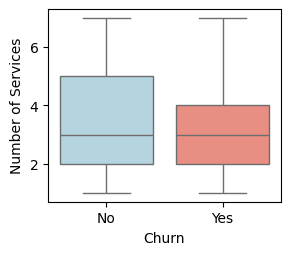

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.boxplot(x='Churn', y='NumServices', data=df2, hue = 'Churn',palette=['lightblue', 'salmon'])

plt.xlabel('Churn')
plt.ylabel('Number of Services')
plt.show()


On average both groups have numbe rof 3 services being used.

More non-churners are using a higher number of services (upper quartile near 5–6).

Churners are clustered in the lower range of service usage.



In [ ]:
df_numeric.corr(method='spearman')['NumServices']


,NumServices
tenure,0.442970
MonthlyCharges,0.775677
TotalCharges,0.725173
charge_diff,0.014110
churn,-0.046411
NumServices,1.000000


Offering more services may contribute to customer stickiness over time, but service count alone isn't a strong driver of churn.

In [ ]:
# classification imbalance degree
df[df['Churn'] == 'Yes'].shape[0]/df.shape[0]

0.2653698707936959

In [ ]:
service_churn_rate

Churn,No,Yes
TechSupport,,
No,0.688138,0.311862
Yes,0.848337,0.151663


in the groups having no techsupport the rate to churn is twice the non using tech support people.

#Churn Prediction

In [ ]:
#for training algorithms some variables can be deleted:
#customerID, Total charges
df.drop(['customerID', 'TotalCharges'], axis = 1, inplace = True)

#dropping categorical variables with low associations with churn

df.drop(['PhoneService', 'MultipleLines', 'gender'], axis = 1, inplace = True)

For ML tasks, it is preferred to encode the variables using OneHotEncoder.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline  # supports resampling steps like SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [ ]:
#separating the dependent and independent variables
X = df2.drop('Churn', axis = 1)
y = df2['Churn'].values

#1. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
#2. Encode labels

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
print("Train labels:", np.unique(y_train))
print("Test labels:", np.unique(y_test))


Train labels: [0 1]
Test labels: [0 1]


In [ ]:
# encode X
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling']
multi_cat_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']
numeric_cols = ['tenure', 'MonthlyCharges']

preprocessor = ColumnTransformer(transformers=[
    ('bin', OrdinalEncoder(), binary_cols),
    ('multi', OneHotEncoder(drop='first', sparse_output=False), multi_cat_cols),
    ('num', StandardScaler(), numeric_cols)     #for linear modelling, svm, knn, nn we will normalize the training set
], remainder='passthrough')  # other features untouched

# Apply encoding
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
#SMOTE resampling of the minorrity label class
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


1. Logistic regerssion

In [1]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression( class_weight='balanced',max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.45).astype(int)

In [1]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [1]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.title('Classification Decision Tree Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
#ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


2.Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [1]:

# Predict
y_pred = gb_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.45).astype(int)


# Evaluate
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


3.Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = 'balanced', n_estimators=300)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [1]:

# Predict
y_pred = rf_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.45).astype(int)


# Evaluate
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [1]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probas = rf_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision and Recall vs. Threshold")
plt.grid(True)
plt.show()


4. SVC

In [1]:

svm_model = SVC(class_weight = 'balanced',probability = True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
#y_pred = le.transform(y_pred)


print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



5.XGBOOST

In [1]:
#XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6. Neural network

In [1]:
#stacking models

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define base learners
base_learners = [
    ('svm', SVC(class_weight = 'balanced',probability = True)),
    ('lr', LogisticRegression( class_weight='balanced',max_iter=200),
     'xgb', XGBClassifier())
]

# Define the meta-model (blender)
meta_model = LogisticRegression(max_iter=200)

# Stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    passthrough=False,  # if True, raw features are also passed to meta-model
    cv=5,
    n_jobs=1
)

# Fit
stack_model.fit(X_train, y_train)

# Predict
y_pred = stack_model.predict(X_test)

# Evaluate
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report

# Prepare tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Neural network without sigmoid in final layer
class ChurnNet(nn.Module):
    def __init__(self, input_dim):
        super(ChurnNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),


            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)  # no sigmoid here!
        )

    def forward(self, x):
        return self.model(x)

model = ChurnNet(input_dim=X_train.shape[1])


In [1]:

# Compute pos_weight
num_pos = y_train.sum()
num_neg = len(y_train) - num_pos
pos_weight = torch.tensor([num_neg / num_pos])  # e.g., tensor([2.84])

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 40
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        logits = model(X_batch).squeeze()
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_logits = model(X_test_tensor).squeeze()
    probs = torch.sigmoid(test_logits)  # Apply sigmoid now
    preds = (probs >= 0.45).int()       # Custom threshold 0.45


print(accuracy_score(y_test_tensor.int(), preds))
print(f1_score(y_test_tensor.int(), preds))
print(precision_score(y_test_tensor.int(), preds))
print(recall_score(y_test_tensor.int(), preds))
print(confusion_matrix(y_test_tensor.int(), preds))